# Robustness and Plasticity in Regulatory Networks

* [Introduction](./RPRN-Introduction.ipynb)
* [BoolNet](./RPRN-BoolNet.ipynb)
* [Functions](#Functions)
    * [Overexpression and KnockOuts](#Overexpression-and-KnockOuts)
    * [Fixed environments](#Fixed-environments)
    * [Truth tables](#Truth-tables)
* [Updating](./RPRN-Updating.ipynb)
* [States](./RPRN-States.ipynb)
* [Appendix](./RPRN-Appendix.ipynb)

# Functions

Functions recapitulate the regulatory interactions and determine the dynamic of the Boolean regulatory network. They are limited by the topology, as nodes can only be directly influeced by their regulators. Changing the functions of a network can create a whole new network. This new network may share some attractors -or cell types- with the original network, but it may also lose or gain other attractors.

The changes in the functions of a network can be associated with multiple biological phenomena. Experiments, environmental factors, evolution, epigenetics and the intrinsic flexibility of the regulatory mechanisms all alter the iteractions of the regulatory network of a biological system.

In this tutorial we will use some of the existing BoolNet functions to study the effect of perturbing the network functions. We will also use some of the labeling functions we discussed in the [BoolNet]((./RPRN-BoolNet.ipynb)) introduction.

In [1]:
#Uncomment next line if you haven't installed BoolNet
#install.packages("BoolNet", repos='http://cran.us.r-project.org')
library(BoolNet)
source("./BoolNet-extensions.R")

## Overexpression and KnockOuts

A lot of experiments  inhibit or overexpress genes, with is equivalent to fixing the functions to 0 or 1. Studing this perturbations is useful for validating the network with known gain and loss of function experiments. It can also be used to predict the effect of difficult experiments like letal or conditional mutants.

First, we need to know how our wild type network will behave. We will use the Th17/iTreg network.

In [2]:
net <- loadNetwork("minTh17iTreg.txt")
WT.attr <- getAttractors(net)

However, analysing this structure can be complicated, we will label them and convert them to a data frame. Here we will use the __attractor2dataframe()__ and __labelAttractors()__ functions.

First we will declare our labelling rules.

In [3]:
labels.rules <- data.frame(
    labels = c('Th0', 'Th17', 'Treg', 'IL10+', 'TGFB+', 'RORGT+'),
    rules  = c('!(RORGT | FOXP3 | TGFB | IL10)', 
            'RORGT & STAT3', 
            'FOXP3 & TGFB', 
            'IL10', 
            'TGFB & ! (RORGT | FOXP3)', 
            'RORGT & ! STAT3' ),
    stringsAsFactors = FALSE
)
labels.rules

,labels,rules
1,Th0,!(RORGT | FOXP3 | TGFB | IL10)
2,Th17,RORGT & STAT3
3,Treg,FOXP3 & TGFB
4,IL10+,IL10
5,TGFB+,TGFB & ! (RORGT | FOXP3)
6,RORGT+,RORGT & ! STAT3


Next we will create a data frame with the information of the labeled attractors.

In [4]:
WT.attr.df <- attractor2dataframe(WT.attr) 
WT.labels <- labelAttractors(WT.attr, net$genes, labels.rules$labels, labels.rules$rules)
WT.attr.df$label <- sapply(WT.labels, function(label) {
    paste(as.character(label), collapse='/')
})
WT.attr.df

,involvedStates,basinSize,label
1,0,27,Th0
2,1,2,Th0
3,4,14,Th0
4,16,13,TGFB+
5,48,8,IL10+TGFB+
6,65,35,Th0
7,68,8,Th0
8,89,13,Treg
9,112,3,IL10+TGFB+
10,121,1,TregIL10+


We can reduce this table to express the states and the total basin size according with the labels.

In [5]:
WT.by.label <- data.frame(
    states = tapply(WT.attr.df$involvedStates, WT.attr.df$label, paste),
    basin = tapply(WT.attr.df$basin, WT.attr.df$label, sum)
)
WT.by.label

,states,basin
IL10+,"544, 608, 672, 736",178
IL10+TGFB+,"48, 112, 176, 240, 304, 368, 432, 496, 560, 624, 688, 752, 816, 880, 944, 1008",371
IL10+TGFB+/TregIL10+,"113/120, 241/248, 369/376, 497/504, 625/632, 753/760, 881/888, 1009/1016",67
RORGT+/TGFB+,"338/341, 466/469",26
TGFB+,"16, 272",39
Th0,"0, 1, 4, 65, 68, 132, 129, 193, 196",152
Th0/Th0,192/197,36
Th17,"278, 342, 406, 470",70
Treg,"89, 217, 345, 473",61
TregIL10+,"121, 249, 377, 505, 633, 761, 889, 1017",24


Now that we know the behavior of the WT network we can begin to perturb it. 

We will do a knock-out experiment, where the value of STAT3 will always be zero. This would be equivalent to deleting the STAT3 gene or inhibiting all the signaling pathways that end in STAT3 activation.

We can fix the value of the node in the original network or we can create a second mutant network. 

In [6]:
KO.net <- fixGenes(net, "STAT3", 0)
KO.net

Boolean network with 10 genes

Involved genes:
IL2 RORGT STAT3 FOXP3 TGFB IL10 IL2e IL21e TGFBe IL10e

Transition functions:
IL2 = (IL2e | (IL2 &  ! FOXP3)) &  ! (STAT3 | (IL10 & ! FOXP3))
RORGT = (STAT3 & TGFB) &  ! FOXP3
STAT3 = (IL21e | STAT3 | RORGT) &  ! (IL10 | IL2)
FOXP3 = (IL2 & (TGFB | FOXP3)) &  ! (STAT3 | RORGT)
TGFB = TGFBe | ((TGFB | FOXP3) &  ! STAT3 )
IL10 = IL10e | (IL10 & (STAT3 | TGFB))
IL2e = IL2e
IL21e = IL21e
TGFBe = TGFBe
IL10e = IL10e

Knocked-out and over-expressed genes:
STAT3 = 0

When doing this be careful of checking the value of the fixed genes to avoid mistakes. You can see this in network$fixed, if the value is -1 BoolNet will use the original function, if the value is 0 the node value will always be 0, and if the value is 1 the node value will always be 1.

In [7]:
KO.net$fixed

IL2 RORGT STAT3 FOXP3  TGFB  IL10  IL2e IL21e TGFBe IL10e 
   -1    -1     0    -1    -1    -1    -1    -1    -1    -1

Now we will determine the attractors, label them, and save them to a dataframe.

In [8]:
KO.attr <- getAttractors(KO.net)
KO.attr.df <- attractor2dataframe(KO.attr) 

KO.labels <- labelAttractors(KO.attr, net$genes, labels.rules$labels, labels.rules$rules)
KO.attr.df$label <- sapply(KO.labels, function(label) {
    paste(as.character(label), collapse='/')
})
KO.attr.df

,involvedStates,basinSize,label
1,0,6,Th0
2,1,2,Th0
3,16,16,TGFB+
4,48,8,IL10+TGFB+
5,65,8,Th0
6,89,16,Treg
7,112,3,IL10+TGFB+
8,121,1,TregIL10+
9,128,6,Th0
10,129,2,Th0


We  can also simulate overexpressions, where the value of STAT3 will always be 1. This would be equivalent to having the STAT3 pathway constitutionally active.

We will create the network, determine the attractors, label them and present them as a dataframe.

In [9]:
Over.net <- fixGenes(net, "STAT3", 1)

Over.attr <- getAttractors(Over.net)
Over.attr.df <- attractor2dataframe(Over.attr) 

Over.labels <- labelAttractors(Over.attr, net$genes, labels.rules$labels, labels.rules$rules)
Over.attr.df$label <- sapply(Over.labels, function(label) {
    paste(as.character(label), collapse='/')
})
Over.attr.df

,involvedStates,basinSize,label
1,4,16,Th0
2,36,16,IL10+
3,68,16,Th0
4,100,16,IL10+
5,132,16,Th0
6,164,16,IL10+
7,196,16,Th0
8,228,16,IL10+
9,278,16,Th17
10,310,16,Th17IL10+


Now we can compare the three networks. Lets begin by seeing the cell types that where recovered in each network.

In [10]:
unique(WT.attr.df$label)
unique(KO.attr.df$label)
unique(Over.attr.df$label)

[1] "Th0"                  "TGFB+"                "IL10+TGFB+"          
 [4] "Treg"                 "TregIL10+"            "Th17"                
 [7] "IL10+"                "IL10+TGFB+/TregIL10+" "Th0/Th0"             
[10] "RORGT+/TGFB+"

[1] "Th0"                  "TGFB+"                "IL10+TGFB+"          
[4] "Treg"                 "TregIL10+"            "IL10+"               
[7] "IL10+TGFB+/TregIL10+"

[1] "Th0"       "IL10+"     "Th17"      "Th17IL10+"

We can see that in the STAT3 KO we attractors like Th17 and some cycles. In the STAT3 over-expression we lose most of the regulatory attractors and the cycles, but we win a new Th17IL10+ attractor.

We can use the function __getFixedAttractors()__ to obtain the attractors and basins of the different fixed networks. By default, this method returns all the single node knockouts and overexpressions. If the attractor cannot be found in a network it returns NA.

In [11]:
mutants <- getFixedAttractors(net)
mutants

Warning message:
In `[<-.factor`(`*tmp*`, ri, value = "⋱"): invalid factor level, NA generatedWarning message:
In `[<-.factor`(`*tmp*`, ri, value = "⋱"): invalid factor level, NA generated

,attr,WT,IL2_0,RORGT_0,STAT3_0,FOXP3_0,TGFB_0,IL10_0,IL2e_0,IL21e_0,ellip.h,IL2_1,RORGT_1,STAT3_1,FOXP3_1,TGFB_1,IL10_1,IL2e_1,IL21e_1,TGFBe_1,IL10e_1
1,0,27,11,15,6,15,24,7,27,27,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,1,2,NA,1,2,2,2,2,2,2,⋯,20,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,100,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,16,NA,NA,NA,NA,NA,NA,NA
4,1001,NA,NA,NA,NA,NA,2,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,1008,47,32,23,7,32,NA,NA,NA,NA,⋯,NA,NA,NA,NA,23,23,47,47,47,47
6,1009-1016,12,NA,4,20,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,6,7,12,12,12,12
7,1010,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,32,NA,NA,NA,NA,NA,NA,NA,NA
8,1014,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,32,NA,NA,NA,NA,NA,NA,NA
9,1017,5,NA,5,5,NA,NA,NA,NA,NA,⋯,32,NA,NA,32,3,2,5,5,5,5
10,112,3,4,1,3,4,NA,NA,NA,3,⋯,NA,NA,NA,NA,11,3,3,NA,NA,NA


Now, lets label the states.

In [12]:
mutants$label <- sapply(mutants$attr, function(states) {
    #break into int vector
    states <- as.numeric(unlist(strsplit(states, "-")))
    label = c() #label each state
    for (s in states) { 
        s <- dec2binState(s, net$genes)
        label <- append(label, labelState(s, net$genes, labels.rules$labels, labels.rules$rules))
    }
    label <- paste(label, collapse='/') #join label
})
mutants

Warning message:
In `[<-.factor`(`*tmp*`, ri, value = "⋱"): invalid factor level, NA generatedWarning message:
In `[<-.factor`(`*tmp*`, ri, value = "⋱"): invalid factor level, NA generated

,attr,WT,IL2_0,RORGT_0,STAT3_0,FOXP3_0,TGFB_0,IL10_0,IL2e_0,IL21e_0,ellip.h,RORGT_1,STAT3_1,FOXP3_1,TGFB_1,IL10_1,IL2e_1,IL21e_1,TGFBe_1,IL10e_1,label
1,0,27,11,15,6,15,24,7,27,27,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,Th0
2,1,2,NA,1,2,2,2,2,2,2,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,Th0
3,100,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,16,NA,NA,NA,NA,NA,NA,NA,IL10+
4,1001,NA,NA,NA,NA,NA,2,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,IL10+
5,1008,47,32,23,7,32,NA,NA,NA,NA,⋯,NA,NA,NA,23,23,47,47,47,47,IL10+TGFB+
6,1009-1016,12,NA,4,20,NA,NA,NA,NA,NA,⋯,NA,NA,NA,6,7,12,12,12,12,IL10+TGFB+/TregIL10+
7,1010,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,32,NA,NA,NA,NA,NA,NA,NA,NA,IL10+RORGT+
8,1014,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,32,NA,NA,NA,NA,NA,NA,NA,Th17IL10+
9,1017,5,NA,5,5,NA,NA,NA,NA,NA,⋯,NA,NA,32,3,2,5,5,5,5,TregIL10+
10,112,3,4,1,3,4,NA,NA,NA,3,⋯,NA,NA,NA,11,3,3,NA,NA,NA,IL10+TGFB+


This dataframe is very complicated, we can reduce it by label. As we will use __sum__ we replaced the NAs for 0.

In [13]:
mutants[is.na(mutants)] <- 0 # NAs to 0
mutants.by.label <- by(mutants[, 2:22], mutants$label, colSums) #colSums by label
mutants.by.label <- t(sapply(mutants.by.label, function(label) label )) #simplify and transpose
mutants.by.label

,WT,IL2_0,RORGT_0,STAT3_0,FOXP3_0,TGFB_0,IL10_0,IL2e_0,IL21e_0,TGFBe_0,,IL2_1,RORGT_1,STAT3_1,FOXP3_1,TGFB_1,IL10_1,IL2e_1,IL21e_1,TGFBe_1,IL10e_1
IL10+,178,98,86,32,102,256,0,89,86,178,⋯,80,0,192,0,0,160,89,92,0,178
IL10+RORGT+,0,0,0,0,0,0,0,0,0,0,⋯,0,320,0,0,0,0,0,0,0,0
IL10+TGFB+,371,222,181,176,218,0,0,231,185,67,⋯,0,0,0,0,324,280,140,186,304,263
IL10+TGFB+/TregIL10+,67,0,29,88,0,0,0,0,37,31,⋯,0,0,0,0,44,56,67,30,36,51
NoLabel,0,0,0,0,0,8,0,0,0,0,⋯,0,0,0,42,0,0,0,0,0,0
NoLabel/Treg,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,8,0,0,0,0,0,0
RORGT+,0,0,0,0,0,0,0,0,0,0,⋯,0,32,0,0,0,0,0,0,0,0
RORGT+/TGFB+,26,0,0,0,16,0,44,0,6,0,⋯,0,0,0,0,24,0,26,20,26,0
RORGT+/Th17,0,0,0,0,0,0,0,0,0,0,⋯,0,56,0,0,0,0,0,0,0,0
TGFB+,39,26,56,80,42,0,54,39,39,13,⋯,0,0,0,0,16,0,0,0,26,0


Still to complicated, lets plot it.

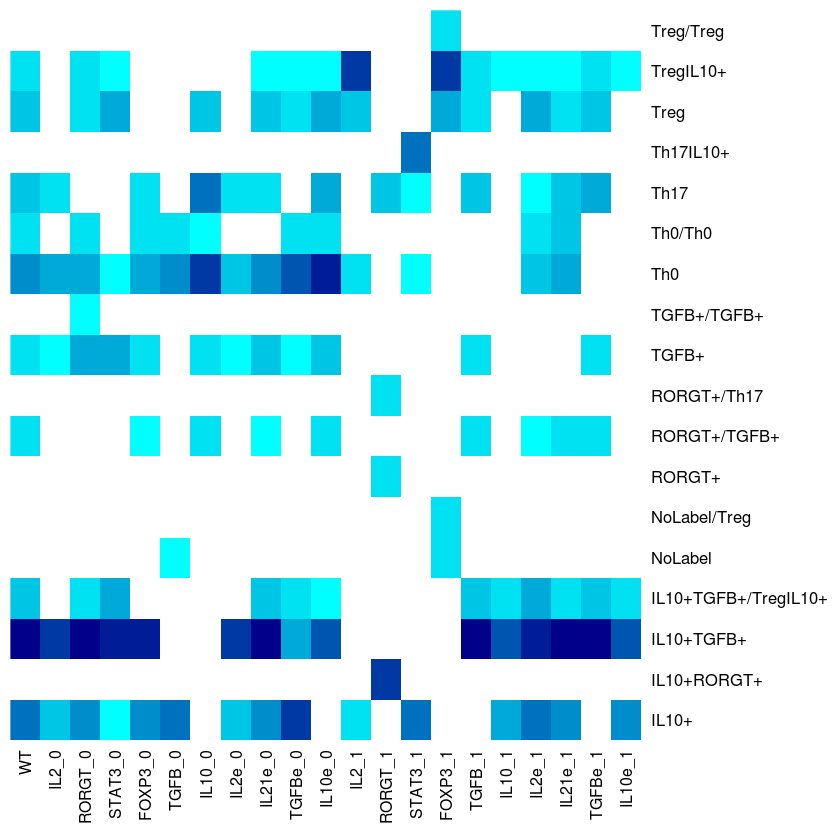

In [16]:
mutants.by.label.matrix <- data.matrix(mutants.by.label) #convert to matrix
mutants.by.label.matrix[mutants.by.label.matrix==0] <- NA #replace 0s for NAs
colfunc <- colorRampPalette(c("cyan", "darkblue")) #nice color scale
mutants.heatmap <- heatmap(mutants.by.label.matrix,  # the heatmap
                            Rowv=NA, Colv=NA, 
                            col= colfunc(10),
                            #col=brewer.pal(3,"Blues"), 
                            scale="column", margins=c(5,10))

As you can see this method fixed created single knockouts and overexpressions for both the genes and signalling pathways and for the input signals. Next we will simulate particular environments and study how changes in the environment affect differentiation and plasticity.

## Fixed environments

The state of a network usually depends in external factors, that can be modeles as inputs. It is possible to simulate the change from one environment to an other by fixing the input nodes to simulate the different environments\cite{Thieffry}. In this section we will study the effect of permanetly changing the environment of a cell type, we will discuss the effect of [transient perturbations later](./RPRN-States.ipynb).

We can use the function __getFixedAttractors()__ to obtain the attractors and basins of the different fixed networks. This method takes a network, the genes to fix, the values and the network label. It returns a data frame with the states and the basin size of each attractor in each network. If the attractor cannot be found in a network it returns NA.

## Truth tables

Trough evolution the regulatory interactions of an organism can change. For example, the regulatory sequence of a gene can be altered or a new element can be added (or lost)\cite{Carlos???}. However, this changes can also occur during the life of an organism: changes in the epigenetic marks, disordered domain proteins, and alternate spliccing can alter the regulatory functions\cite{Newman2014}. Finally, it is possible that there are mistakes in the construction of the network.

This changes usually affect only part of the regulatory function. Verifing the robustness of the attractors in response to small changes in the functions is fundamental for validating the network and for understanding the evolvability of biological systems.

# Next

* [Introduction](./RPRN-Introduction.ipynb)
* [BoolNet](./RPRN-BoolNet.ipynb)
* Functions
* [Updating](./RPRN-Updating.ipynb)
* [States](./RPRN-States.ipynb)
* [Appendix](./RPRN-Appendix.ipynb)